In [1]:
#%run utility_getinputhits.py

In [1]:
from pylab import *
import pandas as pd
from timeit import default_timer as timer

In [2]:
Points = np.fromfile("../../data/MNIST/MNIST_train_data.dat").reshape(-1,785)
Points = Points[:,0:-1]
nPoints,kPoints = Points.shape
wPoints = np.ones(nPoints)

In [3]:
def dis(p1,p2):
    return np.sqrt( np.sum((p1-p2)**2, axis=-1) )

MAXDISTANCE        = 1.5
KERNAL_R           = 0.6
KERNAL_R_NORM      = KERNAL_R
DECISION_RHO_KAPPA = 5
DECISION_NHD       = 0.68
CONTINUITY_NHD     = KERNAL_R


# 1. Find rho and NearestHigher

In [4]:
start = timer()

# find rho and rhorank
rho = []
for i in range(nPoints):
    dr = dis(Points, Points[i])
    local = (dr<KERNAL_R)
    irho = np.sum( wPoints[local] * np.exp( -dr[local]/KERNAL_R_NORM) )
    rho.append(irho)
rho = np.array(rho)
argsortrho = rho.argsort()[::-1]
rhorank = np.empty(len(rho), int)
rhorank[argsortrho] = np.arange(len(rho))

# find NearstHiger and distance to NearestHigher
nh,nhd = [],[]
for i in range(nPoints):
    irho  = rho[i]
    irank = rhorank[i]
    
    higher = rho>irho
    # if no points is higher
    if not (True in higher): 
        nh. append(i)
        nhd.append(MAXDISTANCE)
    else:
        drr  = dis(points[higher], points[i])
        temp = np.arange(len(rho))[higher]
        nh. append(temp[np.argmin(drr)])
        nhd.append(np.min(drr))

            
nh = np.array(nh)
nhd= np.array(nhd)

end = timer()
print("number of rechits: {}".format(nPoints))

print("time: {:3.6} ms".format(1000*(end - start)))

NameError: name 'points' is not defined

# 2. Asign Clusters

In [ ]:
cluster = -np.ones(nPoints,int)
DECISION_RHO = rho.max()/DECISION_RHO_KAPPA

# 2.2 find seeds
selectseed = (rho>DECISION_RHO) & (nhd>DECISION_NHD)
seedrho = rho[selectseed]
temp = seedrho.argsort()[::-1]
seedid = np.empty(len(seedrho), int)
seedid[temp] = np.arange(len(seedrho))
cluster[selectseed] = seedid

# 2.3 asign clusters to seeds
for ith in range(nPoints):
    i = argsortrho[ith]
    if  (cluster[i]<0) & (nhd[i]<CONTINUITY_NHD):
        cluster[i] = cluster[nh[i]]

In [ ]:
result = pd.DataFrame()
result['rho'] = pd.Series(rho)
result['rhorank'] = pd.Series(rhorank)
result['nh'] = pd.Series(nh)
result['nhd'] = pd.Series(nhd)
result['cluster'] = pd.Series(cluster)


# Make Plots

In [ ]:
%matplotlib inline
plt.style.use('classic')
plt.rc("figure",facecolor="w",figsize=(6,4))
plt.rc("font",size=10)
plt.rc("savefig",dpi=300)

In [ ]:
plt.scatter(result.rho[selectseed],result.nhd[selectseed],marker='s',
            s=70,edgecolor="k",color="None",label="seed rechits")
plt.scatter(result.rho, result.nhd, marker='.',edgecolor="None",color="k",label="rechits")
plt.axvline(DECISION_RHO,color="b",label="seed requirement")
plt.axhline(DECISION_NHD,color="b")

plt.xlabel("Energy Density [GeV]")
plt.ylabel("Separation [cm]")
plt.legend(loc="upper left",fontsize=12)
plt.xlim(-0)
plt.ylim(0,2.5)
plt.grid(True)
plt.title("Decision Plot",fontsize=12)


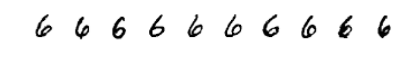

In [126]:
cl = points[cluster==1]
for i in range(10):
    plt.subplot(1,10,i+1)
    img = cl[i].reshape(28,28).T
    plt.imshow(img,cmap="Greys")
    plt.axis('off')